In [2]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

data_features = pd.DataFrame(heart_disease.data.features, columns=heart_disease.data.feature_names)
data_targets = pd.Series(heart_disease.data.targets.squeeze(), name='Outcome')

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

Question 1: 
What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class.
Inductive reasoning is when you use specific observations to make general conclusions. An example of this can be realizing an allergy from consistent pain when eating the same food over and over again. It takes the specific observation of stomachaches from the same exact food and turns it into a general conclusion of an intolerance. 
Deductive reasoning is the opposite, it's where you make specific conclusions that follow a general theory and pattern. 

In [3]:
#Question 2
columns_to_encode = ['sex','cp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
heart_df = pd.get_dummies(data_features[columns_to_encode])
heart_df

,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,1,233,1,2,150,0,2.3,3,0.0,6.0
1,1,4,286,0,2,108,1,1.5,2,3.0,3.0
2,1,4,229,0,2,129,1,2.6,2,2.0,7.0
3,1,3,250,0,0,187,0,3.5,3,0.0,3.0
4,0,2,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
298,1,1,264,0,0,132,0,1.2,2,0.0,7.0
299,1,4,193,1,0,141,0,3.4,2,2.0,7.0
300,1,4,131,0,0,115,1,1.2,2,1.0,7.0
301,0,2,236,0,2,174,0,0.0,2,1.0,3.0


In [1]:
#heart_df = heart_df[['sex','cp','chol','fbs','restecg', 'exang','oldpeak','slope','ca']].dropna()
#heart_df

[1 1 0 0 0 1 3 2 3 1 1 3 0 0 0 2 0 2 0 1 0 0 0 0 2 0 0 0 0 0 3 0 3 0 4 1 0
 1 0 0 3 0 0 0 0 1 0 2 1 2 3 0 3 0 0 2 1 0 0 3 0 3 3 2 0 1 1 0 0 0 2 0 0 0
 0 2 0 0 0 3 0 0 2 1 3 0 0 0 0 4 0 2 1 0 0 0 0 0 3 0 1 0 3 0 0 3 0 1 0 2 0
 0 0 1 0 0 1 1 0 1 1 3 1 0 0 2 2 0 2 2 0 0 1 4 3 1 0 2 3 0 2 0 3 0 0 2 1 0
 1 0 4 0 2 0 2 1 4 0 1 0 0 0 0 0 1 0 2 0 0 3 0 3 0 4 0 0 0 0 1 0 0 2 1 0 4
 2 1 2 0 0 0 3 1 0 0 0 3 0 0 0 0 0 0 0 4 0 0 1 3 2 2 0 1 1 1 1 1 3 3 3 1 0
 1 1 1 1 1 1 2 1 1 0 0 1 0 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 3 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 2 2 2 2 2 2
 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 3 2 2 2 2 2 2 0 3 3 3 2 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 1 3 3 1 3 3
 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 1 3 3 3 1 3 3 3 4 4 4 2 4 4 2 4
 4 2 4 4 4 4 4 4 4 4 4 4 

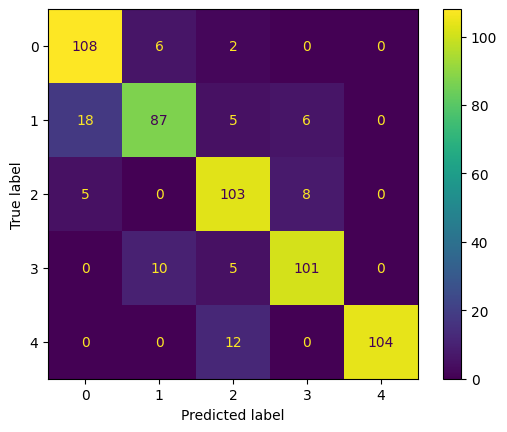

In [7]:
#Question 3
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
X = heart_df
y = data_targets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
model = tree.DecisionTreeClassifier(max_depth=7, random_state=42)
model = model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_resampled)
print(y_pred)
print(classification_report(y_resampled,y_pred))
ConfusionMatrixDisplay.from_predictions(y_resampled, y_pred)


[0.04424731 0.08804262 0.15608025 0.02193052 0.03116075 0.18688038
 0.06023161 0.14949881 0.0477434  0.12637418 0.08781016] Index(['sex', 'cp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


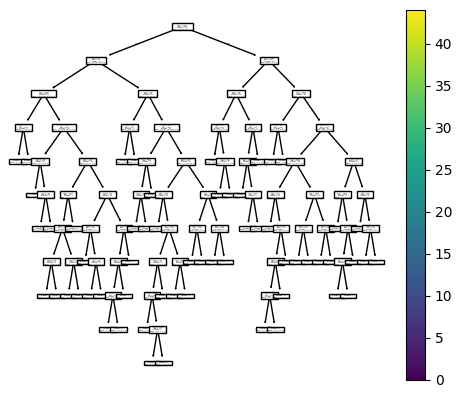

In [8]:
#Question 4
X = heart_df
y = data_targets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    random_state=42)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
print(rf.feature_importances_, X.columns)
import matplotlib.pyplot as plt
rf_tree = rf.estimators_[4]
tree.plot_tree(rf_tree)
plt.savefig("rf_tree.svg")

# Question 5
XGBoost isn't working for me it's saying 32 bit for 64 bit Python ti